In [1]:
# import necessary packages
import os
import pandas
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path
#import earthpy as et

# set file location and name
atb_shp_path = Path('/data/MIDOSS/shapefiles/atb_2018_01.shp')
fac_xls_path = Path(
    '/home/rmueller/Projects/MIDOSS/marine_transport_data/Oil_Transfer_Facilities.xlsx'
)

# import shapefile using geopandas
atb_shp = gpd.read_file(atb_shp_path)

# import facility locations
facWA = pandas.read_excel(
    fac_xls_path,
    sheet_name = 'Washington',
    usecols="B,D,J,K"
)
facBC = pandas.read_excel(
    fac_xls_path,
    sheet_name = 'British Columbia',
    usecols="A,B,C"
)
# view  the top 6 lines of attribute table of data
atb_shp.head(1)

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
0,316001223.0,2018-01-01 00:03:48,2018-01-01 00:05:58,41,US,US,"LINESTRING (-122.77574 48.33663, -122.77796 48..."


In [2]:
# create list of names and MMSI from "Top_six_ATBs_by_DOEtransfers.xlsx"
# NOTE: Island Trader has 3 possible MMSI.  Exploring all three options
MMSI_names = ['ALL ABOARD FOR A CURE','DBL 185','ISLAND TRADER',
              '550-2','ONEDREAM',
              'ISLAND TRADER','ISLAND TRADER']
MMSI_list = [368013040, 338616000, 316001221, 369580000, 367740790,316001223,316006101]
MMSI_colors = ['indigo','olive','lightseagreen',
               'darkgoldenrod','royalblue',
               'mediumturquoise','mediumaquamarine']
# create dictionary linking MMSI to barge name
MMSI_dict = {MMSI_list[num]:MMSI_names[num] for num,name in enumerate(MMSI_names)}
color_dict = {MMSI_list[num]:MMSI_colors[num] for num,name in enumerate(MMSI_names)}

In [3]:
facBC.head(1)

,Name,Latitude,Longitude
0,ESSO Nanaimo Departure Bay,49.192511,-123.949857


In [4]:
facWA.head(1)

,FacilityName,FacilityDOEName,DockLatNumber,DockLongNumber
0,BP Cherry Point Refinery,BP Cherry Point Refinery,48.86111,-122.758


AttributeError: 'dict' object has no attribute 'plot'

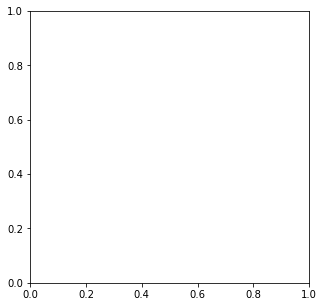

In [15]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (5,5))
atb_shp.plot(ax=ax)
plt.title('All ATB tracks in January')
plt.scatter(facBC["Longitude"],facBC["Latitude"], color='slategrey', marker='o')
plt.scatter(facWA["DockLongNumber"],facWA["DockLatNumber"], 
            color='darkslategrey', marker='o')
#plt.text(x=facBC["Longitude"],y=facBC["Latitude"], s=facBC['Name'].tolist())
plt.show()

### Plot up tracks for the six ATBs responsible for the most imports/exports


In [6]:
# extract information for particular MMSI
atb_shp_indv={}
for MMSI in MMSI_list:
    atb_shp_indv[MMSI] = atb_shp.loc[atb_shp['MMSI_NUM']==MMSI]

368013040
338616000


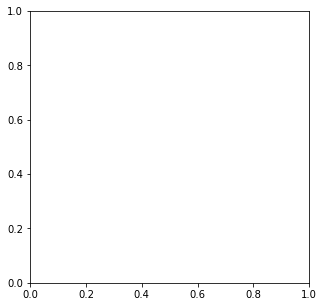

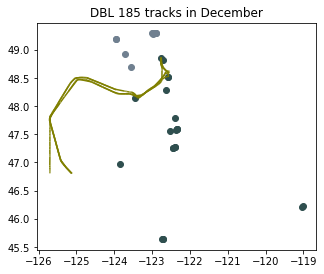

316001221


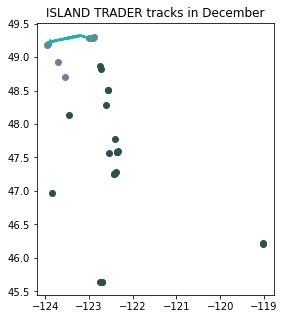

369580000


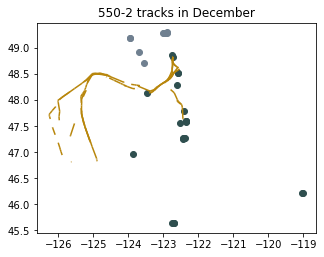

367740790


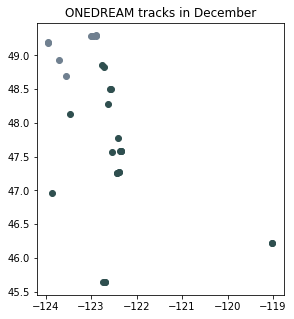

316001223


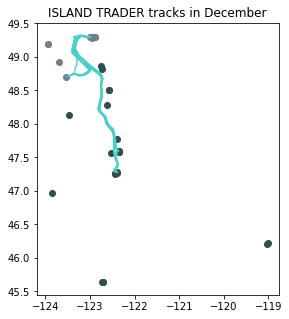

316006101


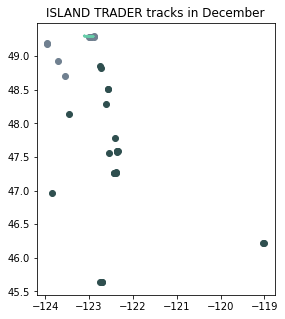

In [8]:
# plot the data using geopandas .plot() method
for MMSI in MMSI_list:
    print(MMSI)
    fig, ax = plt.subplots(figsize = (5,5))
    if atb_shp_indv[MMSI].empty==False:
        atb_shp_indv[MMSI].plot(ax=ax, color=color_dict[MMSI])
        plt.scatter(facBC["Longitude"],facBC["Latitude"], color='slategrey', marker='o')
        plt.scatter(facWA["DockLongNumber"],facWA["DockLatNumber"], 
                    color='darkslategrey', marker='o')
        plt.title(f'{MMSI_dict[MMSI]} tracks in January')
        plt.show()

## Create yearly data

In [13]:
atb_shp_path = {}
atb_shp={}

for months in range(1,13):
    #print(f'{months:02d}')
    # set file location and name
    atb_shp_path[months] = Path(f'/data/MIDOSS/shapefiles/atb_2018_{months:02d}.shp')

    # import shapefile using geopandas
    atb_shp[months] = gpd.read_file(atb_shp_path[months])
    
    if months == 1:
        print('creating shapefile for 2018, starting with January data')
        atb_shp_2018 = atb_shp[months]
    else:
        print(f'Concatenating data from month {months}')
        atb_shp_2018 = gpd.GeoDataFrame(pandas.concat([atb_shp_year, atb_shp[months]]))
        


creating shapefile for 2018, starting with January data
Concatenating data from month 2
Concatenating data from month 3
Concatenating data from month 4
Concatenating data from month 5
Concatenating data from month 6
Concatenating data from month 7
Concatenating data from month 8
Concatenating data from month 9
Concatenating data from month 10
Concatenating data from month 11
Concatenating data from month 12


368013040
338616000


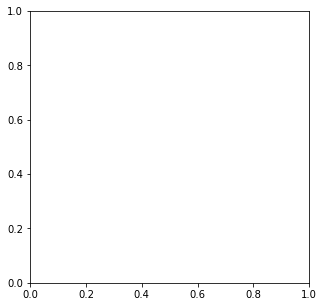

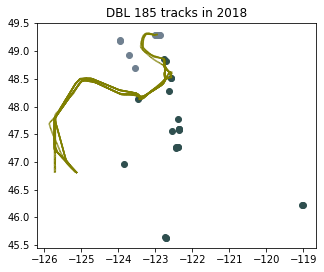

316001221


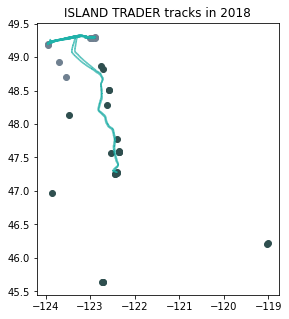

369580000


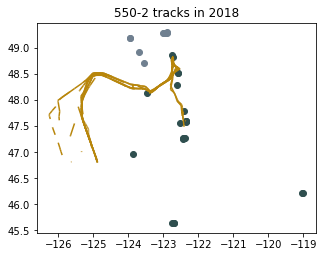

367740790


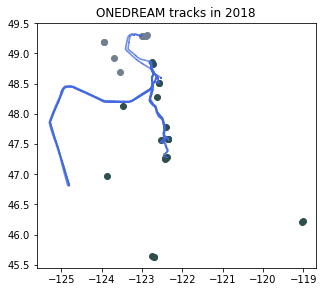

316001223


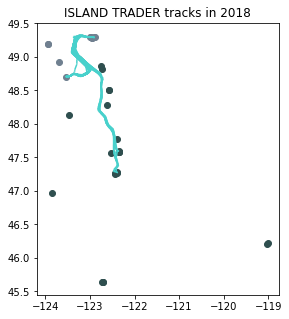

316006101


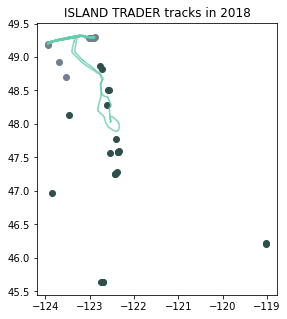

In [14]:
# extract information for particular MMSI
atb_shp_indv={}
for MMSI in MMSI_list:
    print(MMSI)
    atb_shp_indv[MMSI] = atb_shp_2018.loc[atb_shp_2018['MMSI_NUM']==MMSI]
    # plot the data using geopandas .plot() method    
    fig, ax = plt.subplots(figsize = (5,5))
    if atb_shp_indv[MMSI].empty==False:
        atb_shp_indv[MMSI].plot(ax=ax, color=color_dict[MMSI])
        plt.scatter(facBC["Longitude"],facBC["Latitude"], color='slategrey', marker='o')
        plt.scatter(facWA["DockLongNumber"],facWA["DockLatNumber"], 
                    color='darkslategrey', marker='o')
        plt.title(f'{MMSI_dict[MMSI]} tracks in 2018')
        plt.show()

### Plot all ATB traffic in 2018 to compare with tug traffic maps

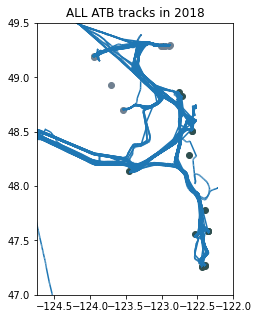

In [17]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (5,5))
atb_shp_2018.plot(ax=ax)
plt.title('ALL ATB tracks in 2018')
plt.scatter(facBC["Longitude"],facBC["Latitude"], color='slategrey', marker='o')
plt.scatter(facWA["DockLongNumber"],facWA["DockLatNumber"], 
            color='darkslategrey', marker='o')
plt.ylim(47,49.5)
plt.xlim(-124.75,-122)
#plt.text(x=facBC["Longitude"],y=facBC["Latitude"], s=facBC['Name'].tolist())
plt.show()

### Plot tug traffic in January to get a sense for distribution of attributed and non-attributed tracks

In [18]:
# set file location and name
barge_shp_path = Path('/data/MIDOSS/shapefiles/barge_2018_01.shp')

# import shapefile using geopandas
barge_shp = gpd.read_file(barge_shp_path)

In [19]:
barge_shp.head(2)

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
0,316001068.0,2018-01-02 21:59:53,2018-01-02 22:58:51,30,None,None,"LINESTRING (-123.87197 49.14501, -123.87852 49..."
1,316001068.0,2018-01-02 22:58:51,2018-01-02 23:03:02,30,None,None,"LINESTRING (-123.87852 49.16581, -123.88184 49..."


In [20]:
barge_shp_none = barge_shp.loc[
    (barge_shp['TO']=='None') &
    (barge_shp['FROM_']=='None')
]

In [23]:
barge_shp_none.head(2)

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry


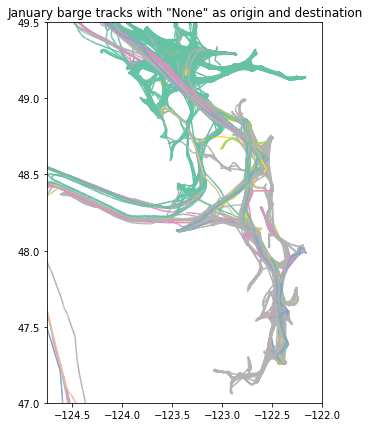

In [27]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10, 7))
barge_shp.plot(ax = ax,
               column='TO', 
                 categorical=True, 
                 label=barge_shp['TO'], 
                 markersize=45, 
                 cmap="Set2"
            );
#ax.legend(loc="upper right", bbox_to_anchor=(1,0.9))
plt.title('January barge tracks with "None" as origin and destination')
plt.ylim(47,49.5)
plt.xlim(-124.75,-122)
plt.show()